<a href="https://colab.research.google.com/github/gobova/crawler/blob/main/test_assigment_lad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import requests
from bs4 import BeautifulSoup

Я использую Adzuna, потому что русские сайты (HeadHunter, Habr career и тд) блокируют реквесты.

In [ ]:
levels = {'Junior':[], 
          'Middle':[], 
          'Senior':[]}
# код городов на сайте Adzuna
regions = {'Москва':'133383',  
            'Нижний Новгород': '134813', 
            'Казань': '133576'}
for level in levels.keys():
  for region in regions.values():
    # Собираем ссылку: вставляем уровни и регионы
    url = f'https://www.adzuna.ru/search?q=Frontend%20{level}&loc={region}'
    response = requests.get(url)
    html = BeautifulSoup(response.text, 'html.parser') 
    html_all_vacancies = html.find('span', {'class': 'mr-1'})
    result = 0
    # если не найдены вакансии, то результат нулевой, чтобы не было ошибки
    if html_all_vacancies != None:
      # из текстовой строки с пробелом делаем число без пробела
      result = int(html_all_vacancies.text.replace(" ", ""))
    levels[level].append(result)

{'Junior': [18, 0, 0], 'Middle': [175, 6, 10], 'Senior': [193, 4, 6]}


Табличное представление результатов

In [ ]:
df = pd.DataFrame(levels, index=regions.keys())
df

,Junior,Middle,Senior
Москва,18,175,193
Нижний Новгород,0,6,4
Казань,0,10,6


Графическое представление результатов

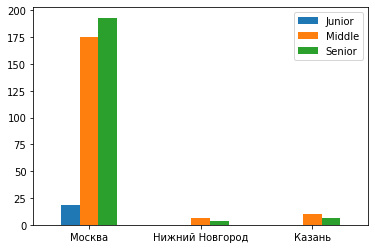

In [ ]:
ax = df.plot.bar(rot=0)